# Read inputs

In [1]:
# Read techno-economic assumptions and transport distances for transport cost calculation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
tea_lh2 = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='LH2', decimal=',', index_col=0)
tea_lh2

,Ref,LH2,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Properties,,,,,,,,,,,,,,,,,,,,,
Properties - Gas density [kg/m3],BOG 2020,71.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [MJ/kg],BOG 2020,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/m3],https://www.rechargenews.com/energy-transitio...,2350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - Boiling point at 1 Bar [°C],NaN,-253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reconversion - Opex opt. [% of Capex],IRENA 2022,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reconversion - Opex pess. [% of Capex],IRENA 2022,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reconversion - Efficiency [% LHV],IRENA 2022,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0


In [3]:
tea_tra = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_tra.csv", delimiter=';', decimal=',')
tea_tra

,Pipelines,Pipeline High,Pipeline Low,Pipeline Retrofit,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Technical Lifetime (y),40.00,40.00,40.00,NaN,NaN,NaN
1,Amortisation factor (%),0.08,0.08,0.08,NaN,NaN,NaN
2,CAPEX (mio$/km),1.21,NaN,NaN,NaN,NaN,NaN
3,CAPEX ($/tpa/km),3.56,1.33,0.73,NaN,NaN,NaN
4,design throughput (kt H2/y),340.00,3400.00,3400.00,NaN,NaN,NaN
5,real throughput (kt H2/y),255.00,NaN,NaN,NaN,NaN,NaN
6,OPEX & Fuel (% of CAPEX/a),0.05,0.05,0.05,NaN,NaN,NaN
7,utilisation (%),0.75,0.75,0.75,NaN,NaN,NaN
8,Cost of pipeline transport ($/1000km/kg H2),0.64,0.24,0.13,NaN,NaN,NaN
9,Interest rate (%),0.08,0.08,0.08,NaN,NaN,NaN


In [39]:
# Electrcity wholesale price projections in $_2018/MWh from DNVGL 2018
p_electricity = pd.read_excel('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx', sheet_name='EL Price', decimal=',', index_col=0)
p_electricity

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Wholesale electricity prices from DNV GL 2019,,,,,,,,,,,,,,,,,,,,,
United Arab Emirates,36.301651,36.764515,37.137776,37.447974,37.747898,38.034395,38.325658,38.655501,39.015448,39.420264,...,53.573530,51.487746,50.336783,49.802097,49.984233,50.739234,51.993049,53.655694,54.814324,56.468935
Angola,121.494032,119.445089,119.580409,124.653779,131.547459,137.405324,141.246042,142.819290,143.098086,143.128137,...,167.313461,168.277022,168.972257,169.434972,169.825687,170.198308,170.217476,170.039948,170.172216,169.924801
Argentina,37.961027,38.086072,39.032196,40.033404,41.148255,42.353416,43.577189,44.818521,46.021991,47.209332,...,73.409441,72.994100,72.420411,72.137700,71.884240,71.715794,71.547577,71.579187,70.985088,71.383909
Austria,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.118220,45.738344,45.399899,...,49.609330,50.705430,51.925184,53.193310,54.221220,54.704721,54.535295,53.994557,53.715329,53.994428
Australia,72.846428,69.396730,66.622798,64.898776,64.515503,64.897234,65.154315,65.256396,65.134265,64.811898,...,38.939740,37.412280,35.994851,34.709238,33.678074,32.794352,32.137023,31.647242,30.594356,29.930791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Philippines,42.402642,44.089299,45.936088,47.946139,50.057150,52.193834,54.433745,57.196590,60.841314,65.569751,...,75.383730,74.831710,74.676203,74.735059,74.746313,74.583895,74.409350,74.323923,74.282002,73.996739
Iceland,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.118220,45.738344,45.399899,...,49.609330,50.705430,51.925184,53.193310,54.221220,54.704721,54.535295,53.994557,53.715329,53.994428
Papua New Guinea,42.402642,44.089299,45.936088,47.946139,50.057150,52.193834,54.433745,57.196590,60.841314,65.569751,...,75.383730,74.831710,74.676203,74.735059,74.746313,74.583895,74.409350,74.323923,74.282002,73.996739


In [4]:
#Definition of variables for pipeline transport costs
tea_pipe = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_pipe.csv", delimiter=';', decimal=',')
tea_pipe

,Pipelines,High,Low,Retrofit,Unnamed: 4
0,Discount rate,0.080,0.080,0.080,NaN
1,Technical Lifetime (y),40.000,40.000,40.000,NaN
2,Amortisation factor (%),0.084,0.084,0.084,NaN
3,CAPEX (mio$/km),1.210,NaN,NaN,NaN
4,CAPEX ($/tpa/km),3.560,1.330,0.730,NaN
5,design throughput (kt H2/y),340.000,3400.000,3400.000,NaN
6,real throughput (kt H2/y),255.000,NaN,NaN,NaN
7,OPEX & Fuel (% of CAPEX/a),0.050,0.050,0.050,NaN
8,utilisation (%),0.750,0.750,0.750,NaN
9,Cost of pipeline transport ($/1000km/kg H2),0.640,0.240,0.130,NaN


In [5]:
# WACC for all transport investments (pipelines, terminals, liquefaction plants)
i_tra = float(tea_pipe[tea_pipe.Pipelines == 'Discount rate']['High'].values)
i_tra

0.08

# Pipeline transport costs

In [6]:
# Economic lifetime for pipelines
l_pipe = float(tea_pipe[tea_pipe.Pipelines == 'Technical Lifetime (y)']['High'].values)
l_pipe

40.0

In [7]:
# Amortisation factor for onshore pipelines
alpha = (i_tra * (1 + i_tra)**l_pipe)/(((1 + i_tra)**l_pipe) - 1)
alpha

0.08386016150058534

In [8]:
# Utilisation of the pipeline in %
pipe_use = float(tea_pipe[tea_pipe.Pipelines == 'utilisation (%)']['High'].values)
pipe_use

0.75

In [9]:
capex_pipe_offshore_EHB = float(tea_pipe[tea_pipe.Pipelines == 'CAPEX ($/tpa/km)']['High'].values)
capex_pipe_offshore_EHB

3.56

In [10]:
# Capex for onshore pipelines constant over time (3.56) divided by pipeline utilisation in [$/tpa/km]
capex_on_high = capex_pipe_offshore_EHB/pipe_use
capex_on_high

4.746666666666667

In [11]:
opex_on_share = float(tea_pipe[tea_pipe.Pipelines == 'OPEX & Fuel (% of CAPEX/a)']['High'].values)
opex_on_share

0.05

In [12]:
# Opex for onshore pipelines constant over time (opex and fuel use in % of capex/a) in [$/tpa/km]
opex_on_high = capex_on_high * opex_on_share
opex_on_high

0.23733333333333337

In [13]:
# Onshore pipeline distance between two countries [km]
d_on = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['onshore distance (km)'].values)
d_on

NameError: name 'tra_d' is not defined

In [ ]:
# Amortisation factor for offshore pipelines
alpha = alpha
alpha

In [ ]:
# Capex for offshore pipelines [$/km] - Offshore multiplicator = 1.25
capex_off_high = 1.25 * capex_on_high/pipe_use
capex_off_high

In [ ]:
# Opex for offshore pipelines [$/km/a]
opex_off_high = 1.25 * opex_on_high
opex_off_high

In [ ]:
# Offshore pipeline distance between two countries [km]
d_off = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['offshore distance (km)'].values)
d_off

In [ ]:
years = np.arange(2020,2051)
result = pd.DataFrame(index=years, columns=['Pipeline_costs'])
result.index.name = 'Years'
result

In [14]:
# Costs for pipeline transport [$/1000km/kg_h2] - assumed to be constant over time
TC_pipe_high = ((alpha * capex_on_high + opex_on_high) * d_on + (alpha * capex_off_high + opex_off_high) * d_off)/1000
TC_pipe_high

NameError: name 'd_on' is not defined

# Total pipeline transport costs

In [15]:
for year in years:
    result.Pipeline_costs.loc[year] = TC_pipe_high
result

NameError: name 'years' is not defined

In [16]:
# Create csv file from results dataframe
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv,'Pipeline_costs.csv')
result.to_csv(output_file, sep = ';')

NameError: name 'result' is not defined

# Seaborne transport cost

## Liquefaction

In [171]:
# WACC for liquefaction plant in %
i_liq = float(tea_lh2.loc['Liquefaction - Discount rate [%]']['LH2'])
i_liq

0.08

In [170]:
# Economic lifetime for the liquefaction plant [years]
l_liq = float(tea_lh2.loc['Liquefaction - Lifetime [Years]']['LH2'])
l_liq

30.0

In [140]:
# Amortisation factor alpha for the liquefaction plant
alpha_liq = (i_liq * (1 + i_liq) ** l_liq) /(((1 + i_liq) ** l_liq) - 1)
alpha_liq


0.08882743338727227

In [25]:
p_el_y = float(p_electricity.loc['Norway'][2025])
p_el_y

46.9570923511

In [24]:
# Electricty consumption for the liquefaction in [kWh/kg_h2]
el_liq = float(tea_lh2.loc['Liquefaction - Electricity use [kWh/kg H2]']['LH2'])
el_liq

KeyError: 'Liquefaction - Electricity use [kWh/kg H2]'

### Calc. liquefaction cost

In [18]:
# Definition of the cost calculation function for liquefaction costs. Time relevant variables = capex [€/tpa], opex [€/tpa], electricity use [kwh/kg H2], electricity price [$/MWh]
def calculate_liq_costs(alpha_liq, capex_liq_y, opex_liq_y, el_liq_y, p_el_y):

    result = float((alpha_liq * capex_liq_y/1000 + opex_liq_y/1000) + el_liq_y * p_el_y*0.89/1000)

    return result

In [27]:
# Calculation of liquefaction costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['Liquefaction_costs'])
result.index.name = 'Years'

for year in years:

    # get capex, opex, natural gas price and CO2 price of specific year
    capex_liq_y = float(tea_lh2.loc['Liquefaction - Capex opt. [€/t/a]'][year])
    opex_liq_y = float(tea_lh2.loc['Liquefaction - Opex opt. [% of Capex]'][year])
    el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
    p_el_y = float(p_electricity.loc['Norway'][year])

    # calculate costs of specific year
    result.Liquefaction_costs.loc[year] = calculate_liq_costs(alpha_liq=alpha_liq, capex_liq_y=capex_liq_y, opex_liq_y=opex_liq_y, el_liq_y=el_liq_y, p_el_y=p_el_y)

result

NameError: name 'alpha_liq' is not defined

In [408]:
# Create csv file from results dataframe
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv,'Liquefaction_costs.csv')
result.to_csv(output_file, sep = ';')

### Plot liquefaction costs

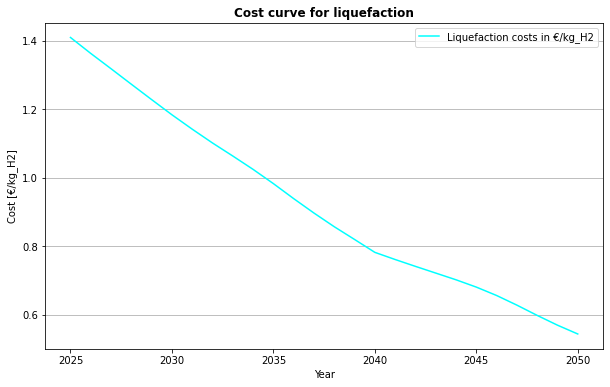

In [409]:
# Plot cost curve for liquefaction
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'cyan', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for liquefaction', fontweight = 'bold')
plt.legend(['Liquefaction costs in €/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [€/kg_H2]')
plt.show()

## Export terminal

In [28]:
# Lifetime of import and export terminals
l_ter = float(tea_lh2.loc['Export Terminal - Technical lifetime [Years]']['LH2'])
# Amortisation factor for the export terminal
alpha_et = (i_tra * (1 + i_tra) ** l_ter) / (((1 + i_tra) ** l_ter) - 1)

# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])


In [29]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et = float(tea_lh2.loc['Export Terminal - Electricity use [kWh/kgH2]']['LH2'])
el_et

0.61

In [30]:
# Boil-off hydrogen in [%/day]
bog_et = float(tea_lh2.loc['Export Terminal - Boil off rate [%/day]']['LH2'])
bog_et

0.001

In [31]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])
t_et

3.0

In [32]:
# Cost of transported hydrogen in [$/kg_h2] in year y
lcoh_ngr = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LCOH_NGR.csv", delimiter=';', decimal=',', index_col=0)
lcoh_ngr

,LCOH_BLUE
Years,
2025,1.355229683829041
2026,1.3547288247682192
2027,1.3524279657073974
2028,1.3510271066465753
2029,1.348726247585753
2030,1.3464253885249315
2031,1.3426755999423288
2032,1.3383093231883563
2033,1.3338132575880821


### Calc. export terminal cost

In [33]:
# Definition of the cost calculation function for the Export terminal.
# Time relevant variables = capex [$/tpa], opex [$/tpa], electricity use [kwh/kg H2], electricity price [$/MWh], boil off in [%/d], storage time in days, lcoh in [$/kg_h2]
def calculate_export_terminal_costs(alpha_et, capex_et_y, opex_et_y, el_et, p_el_y, lcoh_ngr_y):
    result = (alpha_et * capex_et_y/1000 + opex_et_y/1000) + el_et * p_el_y*0.89/1000 + bog_et * t_et * lcoh_ngr_y

    return result

In [34]:
#Calculation of export terminal costs [$/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Export_terminal_costs'])
result.index.name = 'Years'

In [35]:
print(float(tea_lh2.loc['Export Terminal - Annual OPEX [% of CAPEX]'][2020]))

26.600249066002494


In [37]:
for year in years:
    # get capex, opex, xx
    capex_et_y = float(tea_lh2.loc['Export Terminal - CAPEX/tank [€/t/a]'][year])
    opex_et_y = float(tea_lh2.loc['Export Terminal - Annual OPEX [% of CAPEX]'][year])
    p_el_y = float(p_electricity.loc['Norway'][year])
    lcoh_ngr_y = float(lcoh_ngr.loc[year]['LCOH_BLUE'])

    # calculate costs of specific year
    result.Export_terminal_costs.loc[year] = calculate_export_terminal_costs(alpha_et=alpha_et, capex_et_y=capex_et_y,
                                                              opex_et_y=opex_et_y, el_et=el_et, p_el_y=p_el_y, lcoh_ngr_y=lcoh_ngr_y)

result

,Export_terminal_costs
Years,
2025,0.110946
2026,0.109794
2027,0.108769
2028,0.107702
2029,0.106654
2030,0.105646
2031,0.103736
2032,0.101957
2033,0.100362


In [38]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Export_terminal_costs.csv')
result.to_csv(output_file, sep=';')

### Plot export terminal costs

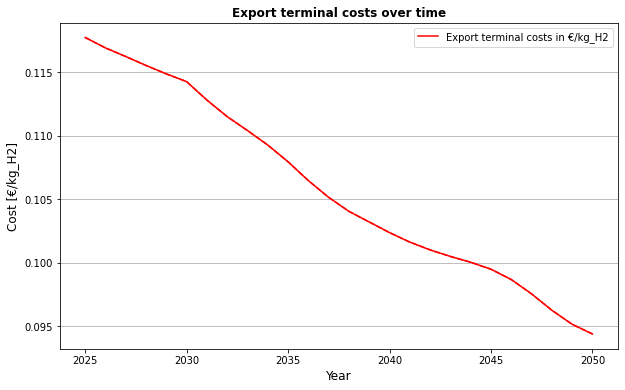

In [420]:
# Plot cost curve for export terminal costs
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Export terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Export terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()

## Shipping

In [49]:
# Technical lifetime of ships in years
l_ship = float(tea_lh2.loc['Shipping - Technical Lifetime [Years]']['LH2'])
l_ship

30.0

In [50]:
# Amortisation factor for shipping
alpha_ship = (i_tra * (1 + i_tra) ** l_ship) / (((1 + i_tra) ** l_ship) - 1)
alpha_ship


0.08882743338727227

In [51]:
# Distance between countries via ship in [km]
#d_sea = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['sea distance (km)'].values)
d_sea = 10000


In [52]:
# Ship speed in [km/h]
v_ship = float(tea_lh2.loc['Shipping - Ship speed [km/h]']['LH2'])
v_ship

30.0

In [53]:
# Berthing time (time for unloading and loading in a harbour) in [h]
h_ship = float(tea_lh2.loc['Shipping - Berthing time [hours]']['LH2'])
h_ship


48.0

In [54]:
# Boil-off when shipping in [%/h]
bog_ship = float(tea_lh2.loc['Shipping - Boil off opt. [%/day]']['LH2'])
bog_ship

0.002

In [55]:
# Fuel consumption of a ship in [kg_h2/km]
f_ship = float(tea_lh2.loc['Shipping - Fuel use [kg H2/t/km]']['LH2'])
f_ship


0.01127193913122556

### Calc. shipping costs

In [56]:
# Definition of the cost calculation function for the maritime shipping. Time relevant variables = capex [€/t], opex [€/t/a], lcoh in [€/kg_h2]
def calculate_ship_costs(alpha_ship, capex_ship_y, opex_ship_y, d_sea, v_ship, h_ship, bog_ship, f_ship, lcoh_ngr_y):
    result = (alpha_ship * capex_ship_y/1000 + opex_ship_y/1000)/(8760/(2*(d_sea/v_ship + h_ship)))/((1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea)) + (bog_ship * d_sea/v_ship + f_ship * d_sea) * lcoh_ngr_y)

    return result

In [57]:
# Calculation of shipping costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Shipping_costs'])
result.index.name = 'Years'

for year in years:
    # get capex, opex, xx
    capex_ship_y = float(tea_lh2.loc['Shipping - Capex/Ship opt. [€/t of carrier]'][year])
    opex_ship_y = float(tea_lh2.loc['Shipping - Annual Opex opt. [€/t/a]'][year])
    lcoh_ngr_y = float(lcoh_ngr.loc[year]['LCOH_BLUE'])

    # calculate costs of specific year
    result.Shipping_costs.loc[year] = calculate_ship_costs(alpha_ship=alpha_ship, capex_ship_y=capex_ship_y, opex_ship_y=opex_ship_y, d_sea=d_sea, v_ship=v_ship, h_ship=h_ship, bog_ship=bog_ship, f_ship=f_ship, lcoh_ngr_y=lcoh_ngr_y)

result

,Shipping_costs
Years,
2025,0.03756
2026,0.035705
2027,0.034013
2028,0.032219
2029,0.030488
2030,0.028734
2031,0.027069
2032,0.025412
2033,0.023723


In [58]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Shipping_costs.csv')
result.to_csv(output_file, sep=';')

### Plot shipping costs

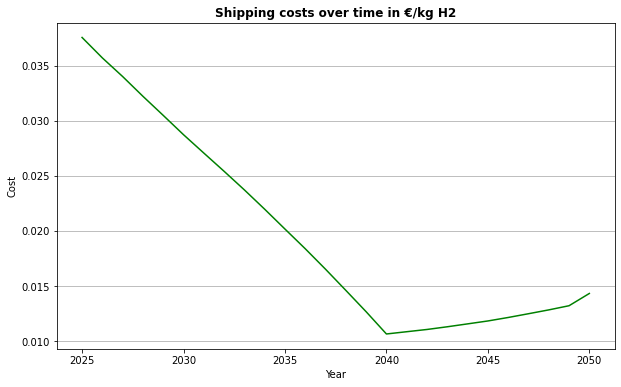

In [59]:
# Plot cost curve of hydrogen production from NGR with CCS
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Shipping costs over time in €/kg H2', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

## Import terminal

In [60]:
# Definition of variables for the import terminal costs

In [61]:
# Amortisation factor for the import terminal
alpha_it = alpha_et

In [62]:
# Electricity consumption in kWh/kg H2
el_it = float(tea_lh2.loc['Import Terminal - Electricity use [kWh/kg H2]']['LH2'])
el_it

0.2

In [63]:
# Import terminal boil-off in [%/day]
bog_it = float(tea_lh2.loc['Import Terminal - Boil-off [%/day]']['LH2'])
bog_it

0.001

In [64]:
# Average storage time in the export terminal tanks in days
t_it = float(tea_lh2.loc['Import Terminal - Storage length per load [days]']['LH2'])
t_it

20.0

In [65]:
# Import terminal costs in [$/kg_h2]:
# Capex for the import terminal in [$/tpa]
# Opex for the import terminal in [$/tpa]
# Electricity consumption for the import terminal in [kWh/kg_h2]
# Price for electricity in importing country [$/MWh]
# Import terminal boil-off in [%/h]
# Berthing time in import terminal in [h]
# Cost of transported hydrogen in [$/kg_h2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Import_terminal_costs'])
result.index.name = 'Years'

def calculate_import_terminal_costs(alpha_it, capex_it_y, opex_it_y, el_it, p_el_y, bog_it, t_it, lcoh_ngr_y):
    result = (alpha_it * capex_it_y/1000 + opex_it_y/1000) + el_it * p_el_y/1000 + bog_it * t_it * lcoh_ngr_y

    return result

In [68]:
for year in years:
    # get capex, opex, xx
    capex_it_y = float(tea_lh2.loc['Import Terminal - CAPEX [€/t/a]'][year])
    opex_it_y = float(tea_lh2.loc['Import Terminal - OPEX [€/t/a]'][year])
    p_el_y = float(p_electricity.loc['Norway'][year])
    lcoh_ngr_y = float(lcoh_ngr.loc[year]['LCOH_BLUE'])

    # calculate costs of specific year
    result.Import_terminal_costs.loc[year] = calculate_import_terminal_costs(alpha_it=alpha_it, capex_it_y=capex_it_y,
                                                              opex_it_y=opex_it_y, el_it=el_it, p_el_y=p_el_y, bog_it=bog_it, t_it=t_it, lcoh_ngr_y=lcoh_ngr_y)

result

,Import_terminal_costs
Years,
2025,0.574494
2026,0.568713
2027,0.562944
2028,0.557177
2029,0.5514
2030,0.545638
2031,0.532831
2032,0.520061
2033,0.507357


In [69]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Import_terminal_costs.csv')
result.to_csv(output_file, sep=';')

### Plot import terminal costs

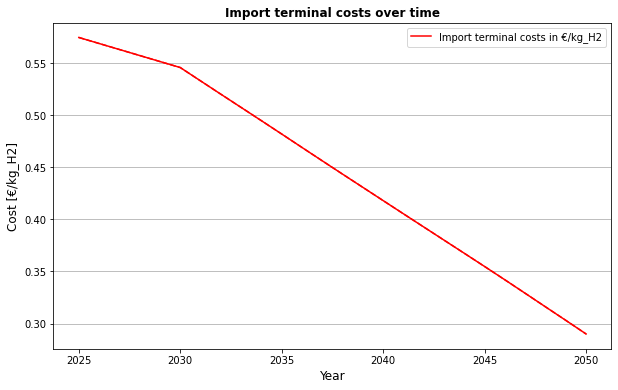

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Import terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Import terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()

# Total costs for LH2 seaborne transport

In [71]:
liq_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Liquefaction_costs.csv', delimiter=';', decimal=',')
et_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Export_terminal_costs.csv', delimiter=';', decimal=',')
ship_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Shipping_costs.csv', delimiter=';', decimal=',')
it_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Import_terminal_costs.csv', delimiter=';', decimal=',')

In [72]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_transport'])
result.index.name = 'Years'

In [73]:
# Calculate total transport costs from liquefaction costs (LC), export terminal costs (EC), Shipping costs (SC), import terminal costs (IC)
def calculate_seaborne_transport_costs(LC,EC,SC,IC):
    result = LC + EC + SC + IC

    return result

In [74]:
for year in years:
    # get all costs
    LC = float(liq_costs[liq_costs.Years == year]['Liquefaction_costs'])
    EC = float(et_costs[et_costs.Years == year]['Export_terminal_costs'])
    SC = float(ship_costs[ship_costs.Years == year]['Shipping_costs'])
    IC = float(it_costs[it_costs.Years == year]['Import_terminal_costs'])

    # calculate costs of specific year
    result.LH2_transport.loc[year] = calculate_seaborne_transport_costs(LC=LC,EC=EC, SC=SC, IC=IC)

result

,LH2_transport
Years,
2025,1.727341
2026,1.70488
2027,1.684164
2028,1.662883
2029,1.641951
2030,1.621488
2031,1.595977
2032,1.571961
2033,1.549927


In [75]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Seaborne_transport_costs.csv')
result.to_csv(output_file, sep=';')

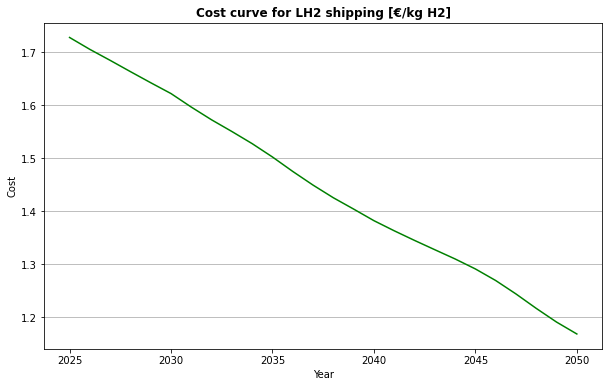

In [76]:
# Plot cost curve for seaborne transport
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for LH2 shipping [€/kg H2]', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 3 with shape (7,).

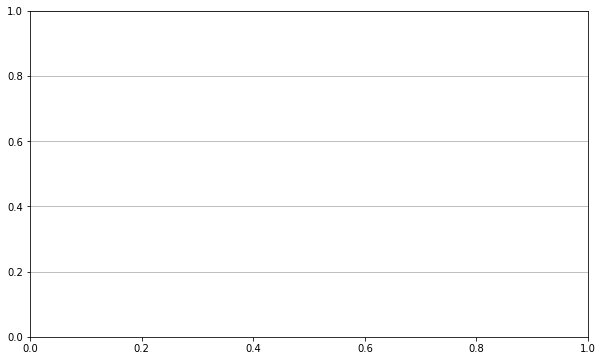

In [77]:
# Cost breakdown for LH2 shipping
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
LC = (liq_costs.loc[::5]['Liquefaction_costs']).apply(pd.to_numeric)
EC = (et_costs.loc[::5]['Export_terminal_costs']).apply(pd.to_numeric)
SC = (ship_costs.loc[::5]['Shipping_costs']).apply(pd.to_numeric)
IC = (it_costs.loc[::5]['Import_terminal_costs']).apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence

IC_plt = plt.bar(x,IC, width, label='Import terminal costs', bottom= LC + EC + SC)
SC_plt = plt.bar(x,SC, width, label='Shipping costs', bottom= LC + EC)
EC_plt = plt.bar(x,EC, width, label='Export terminal costs', bottom= LC)
LC_plt = plt.bar(x,LC, width, label='Liquefaction costs')

plt.title('Cost breakdown for LH2 shipping', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Transport cost [€/kg H2]')
plt.xlabel('Years')
plt.show()

# Total seaborne transport costs

In [78]:
# Costs for seaborne transport via ship [€/kg_h2]
sea_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Seaborne_transport_costs.csv', delimiter=';', decimal=',')
sea_costs

,Years,LH2_transport
0,2025,1.7273406879205069
1,2026,1.7048797007387633
2,2027,1.6841640176722845
3,2028,1.6628831320410762
4,2029,1.6419511796762278
5,2030,1.6214882657631948
6,2031,1.595977454617882
7,2032,1.5719614082981908
8,2033,1.549926602281214
9,2034,1.5270276729677343


In [79]:
def choose_minimal_transport_costs(TC_pipe_high,TC_sea):
    result = min(TC_pipe_high, TC_sea)

    return result

In [80]:
years = np.arange(2020, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_transport_costs'])
result.index.name = 'Years'

for year in years:
    # get all costs
    TC_sea = float(sea_costs[sea_costs.Years == year]['Seaborne_transport_costs'])

    # calculate costs of specific year
    result.Minimal_transport_costs.loc[year] = choose_minimal_transport_costs(TC_pipe_high=TC_pipe_high,TC_sea=TC_sea)

result

KeyError: 'Seaborne_transport_costs'

In [81]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Minimal_transport_costs.csv')
result.to_csv(output_file, sep=';')

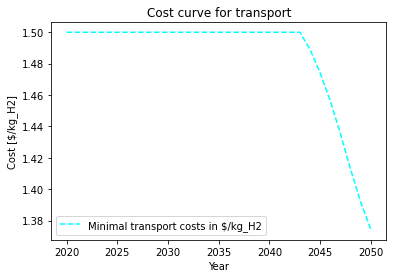

In [574]:
# Plot cost curve for seaborne transport
plt.plot(result, color='cyan', linestyle='dashed')
plt.title('Cost curve for transport')
plt.legend(['Minimal transport costs in $/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [$/kg_H2]')
plt.show()
